<a href="https://colab.research.google.com/github/dmswn1004/Python_Data-visualization/blob/main/21_%EC%A7%80%EB%8F%84_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 79.1 MB/s eta 0:00:00


In [5]:
!pip install -U mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import geopandas as gdp

In [6]:
countries = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
cities = gdp.read_file(gdp.datasets.get_path('naturalearth_cities'))

<ipython-input-6-68980a8cd22c>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gdp.read_file(gdp.datasets.get_path('naturalearth_lowres'))
<ipython-input-6-68980a8cd22c>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gdp.read_file(gdp.datasets.get_path('naturalearth_cities'))


In [7]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [8]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


In [9]:
type(countries)

geopandas.geodataframe.GeoDataFrame

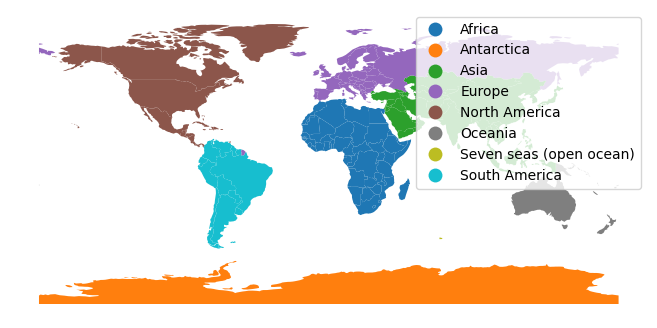

In [10]:
from pandas.core.arrays import categorical
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,4)
ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_axis_off()
plt.show() 

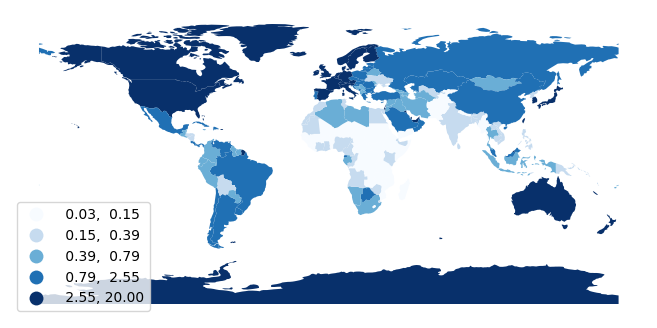

In [11]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100
ax = countries.plot(column='gdp_per_cap', legend=True, legend_kwds={'loc' : 'lower left'}, scheme='quantiles', cmap="Blues")

ax.set_axis_off()
plt.show()

In [12]:
countries.geom_type[1]

'Polygon'

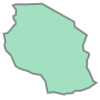

In [13]:
countries.geometry[1]

In [14]:
print(countries.geometry[1])

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673841980285, 33.73972000000009 -9.4171

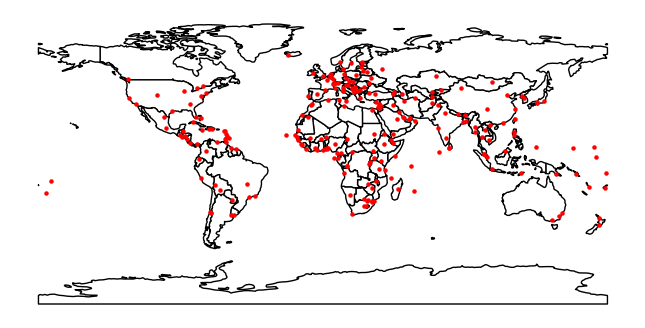

In [15]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
plt.show()

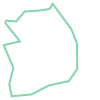

In [16]:
korea_border = countries[countries.name == "South Korea"].geometry
korea_border.boundary.squeeze()

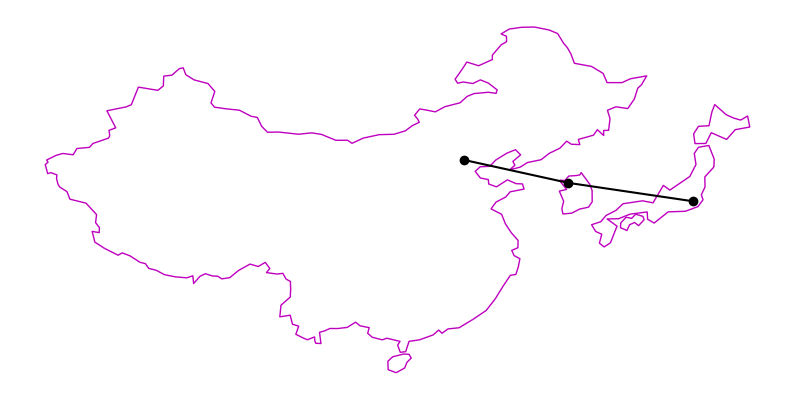

In [17]:
from shapely.geometry import Point, Polygon, LineString

northern_asia = countries.loc[countries['name'].isin(['South Korea', 'China', 'Japan'])]
base = northern_asia.plot(figsize=(10,10), color="w", edgecolor="m")

seoul = cities.loc[cities.name == "Seoul", "geometry"].squeeze()
beijing = cities.loc[cities.name == "Beijing", "geometry"].squeeze()
tokyo = cities.loc[cities.name == "Tokyo", "geometry"].squeeze()

line = LineString([beijing, seoul, tokyo])

ax = gdp.GeoSeries([seoul, beijing, tokyo, line]).plot(ax=base, color="k", edgecolor="k")
ax.set_axis_off()
plt.show()

In [18]:
korea = countries.loc[countries['name'] == 'South Korea', 'geometry'].squeeze()
china = countries.loc[countries.name == "China", "geometry"].squeeze()
japan = countries.loc[countries.name == "Japan", "geometry"].squeeze()

In [19]:
seoul.within(korea) # 서울이 한국에 포함되는가

True

In [20]:
korea.contains(seoul) # 한국은 서울을 포함하는 가

True

In [21]:
korea.intersects(china) # 지리적으로 교차하는가

False

In [23]:
line.crosses(korea) # 베이징-서울-도쿄 라인이 한국을 지나가는가

True

In [22]:
countries[countries.crosses(line)] # 라인이 지나가는 국가들

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


In [24]:
seoul.distance(beijing) # 서울-베이징 거리

10.857295783020785

In [25]:
# 서울-베이징 거리보다 가가운 범위 내의 국가들
countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]

<ipython-input-25-e7f74b5f6bdb>:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries[countries.geometry.distance(seoul) <= seoul.distance(beijing)]


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
18,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",1.177415
95,2.566616e+07,Asia,North Korea,PRK,40000,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ...",0.155847
96,5.170910e+07,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840...",3.184621
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.026168
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.024688


In [26]:
china.area / korea.area

95.89679828612043